In [3]:

import re
import statistics
import scipy.stats as stats
import numpy as np

# Calculate the lengths of all sentences
sentence_lengths = [len(sentence) for sentence in single_sentences_list]

min_length = min(sentence_lengths)
max_length = max(sentence_lengths)
average_length = sum(sentence_lengths) / len(single_sentences_list)
std_deviation = statistics.stdev(sentence_lengths)
variance = statistics.variance(sentence_lengths)
median_length = statistics.median(sentence_lengths)
mode_length = statistics.mode(sentence_lengths)
percentile_25 = np.percentile(sentence_lengths, 25)
percentile_50 = np.percentile(sentence_lengths, 50)
percentile_75 = np.percentile(sentence_lengths, 75)
percentile_90 = np.percentile(sentence_lengths, 90)

# Calculate advanced statistics
skewness = stats.skew(sentence_lengths)
kurtosis = stats.kurtosis(sentence_lengths)
iqr = np.percentile(sentence_lengths, 75) - np.percentile(sentence_lengths, 25)
cv = (std_deviation / average_length) * 100
data_range = max_length - min_length
mad = np.median(np.abs(sentence_lengths - np.median(sentence_lengths)))

print(f"Minimum sentence length: {min_length} characters")
print(f"Maximum sentence length: {max_length} characters")
print(f"Average sentence length: {average_length} characters")
print(f"Standard deviation of sentence lengths: {std_deviation}")
print(f"Variance of sentence lengths: {variance}")
print(f"Median sentence length: {median_length} characters")
print(f"Mode sentence length: {mode_length} characters")
print(f"25th percentile sentence length: {percentile_25} characters")
print(f"50th percentile sentence length: {percentile_50} characters")
print(f"75th percentile sentence length: {percentile_75} characters")
print(f"90th percentile sentence length: {percentile_90} characters")
print(f"Skewness of sentence lengths: {skewness}")
print(f"Kurtosis of sentence lengths: {kurtosis}")
print(f"Interquartile range (IQR) of sentence lengths: {iqr}")
print(f"Coefficient of variation (CV) of sentence lengths: {cv}%")
print(f"Range of sentence lengths: {data_range} characters")
print(f"median absolute deviation of sentence lengths: {mad} characters")


Minimum sentence length: 10 characters
Maximum sentence length: 594 characters
Average sentence length: 210.8507462686567 characters
Standard deviation of sentence lengths: 138.38771334182852
Variance of sentence lengths: 19151.1592039801
Median sentence length: 192 characters
Mode sentence length: 217 characters
25th percentile sentence length: 129.5 characters
50th percentile sentence length: 192.0 characters
75th percentile sentence length: 266.5 characters
90th percentile sentence length: 385.2 characters
Skewness of sentence lengths: 0.9599552609110755
Kurtosis of sentence lengths: 0.49585590059410345
Interquartile range (IQR) of sentence lengths: 137.0
Coefficient of variation (CV) of sentence lengths: 65.63302041411843%
Range of sentence lengths: 584 characters
median absolute deviation of sentence lengths: 66.0 characters


In [10]:
from scripts.splitter import split_into_sentences_from_file
file_path = "data/Robinson Advisory.docx"

single_sentence = split_into_sentences_from_file(file_path)
len(single_sentence)

64

In [12]:
sentences = [{'sentence': x, 'index' : i} for i, x in enumerate(single_sentence)]

In [13]:

def combine_sentences(sentences, buffer_size=2):
    sentences = [{'sentence': x, 'index' : i} for i, x in enumerate(sentences)]
    # Go through each sentence dict
    for i in range(len(sentences)):

        # Create a string that will hold the sentences which are joined
        combined_sentence = ''

        # Add sentences before the current one, based on the buffer size.
        for j in range(i - buffer_size, i):
            # Check if the index j is not negative (to avoid index out of range like on the first one)
            if j >= 0:
                # Add the sentence at index j to the combined_sentence string
                combined_sentence += sentences[j]['sentence'] + ' '

        # Add the current sentence
        combined_sentence += sentences[i]['sentence']

        # Add sentences after the current one, based on the buffer size
        for j in range(i + 1, i + 1 + buffer_size):
            # Check if the index j is within the range of the sentences list
            if j < len(sentences):
                # Add the sentence at index j to the combined_sentence string
                combined_sentence += ' ' + sentences[j]['sentence']

        # Then add the whole thing to your dict
        # Store the combined sentence in the current sentence dict
        sentences[i]['combined_sentence'] = combined_sentence

    return sentences


In [30]:
s = [
    "A ",
    "B ",
    "C ",
    "D ",
    "E ",
    "F ",
    "G ",
    "H ",
    "I ",
]

In [34]:
combine_sentences(single_sentence)

[{'sentence': 'ADVISORY SERVICES AGREEMENT\n\nThis Advisory Services Agreement is entered into as of June 15th, 2023 (the “Effective Date”), by and between Cloud Investments Ltd., ID 51-426526-3, an Israeli company (the "Company"), and Mr.',
  'index': 0,
  'combined_sentence': 'ADVISORY SERVICES AGREEMENT\n\nThis Advisory Services Agreement is entered into as of June 15th, 2023 (the “Effective Date”), by and between Cloud Investments Ltd., ID 51-426526-3, an Israeli company (the "Company"), and Mr. Jack Robinson, Passport Number 780055578, residing at 1 Rabin st, Tel Aviv, Israel, Email: jackrobinson@gmail.com ("Advisor"). Whereas,\tAdvisor has expertise and/or knowledge and/or relationships, which are relevant to the Company’s business and the Company has asked Advisor to provide it with certain Advisory services, as described in this Agreement; and\nWhereas, \tAdvisor has agreed to provide the Company with such services, subject to the terms set forth in this Agreement.'},
 {'senten

In [14]:
sentences = combine_sentences(single_sentence)


In [15]:
sentences[0]

{'sentence': 'ADVISORY SERVICES AGREEMENT\n\nThis Advisory Services Agreement is entered into as of June 15th, 2023 (the “Effective Date”), by and between Cloud Investments Ltd., ID 51-426526-3, an Israeli company (the "Company"), and Mr.',
 'index': 0,
 'combined_sentence': 'ADVISORY SERVICES AGREEMENT\n\nThis Advisory Services Agreement is entered into as of June 15th, 2023 (the “Effective Date”), by and between Cloud Investments Ltd., ID 51-426526-3, an Israeli company (the "Company"), and Mr. Jack Robinson, Passport Number 780055578, residing at 1 Rabin st, Tel Aviv, Israel, Email: jackrobinson@gmail.com ("Advisor"). Whereas,\tAdvisor has expertise and/or knowledge and/or relationships, which are relevant to the Company’s business and the Company has asked Advisor to provide it with certain Advisory services, as described in this Agreement; and\nWhereas, \tAdvisor has agreed to provide the Company with such services, subject to the terms set forth in this Agreement.'}

Embed using scapy

In [16]:
import spacy

# Load the spaCy embedder
nlp = spacy.load('en_core_web_sm')

# Create embedding vectors for the input sentences using the spaCy embedder
embeddings = [nlp(sentence).vector for sentence in [x['combined_sentence'] for x in sentences]]

In [17]:
for i, sentence in enumerate(sentences):
    sentence['combined_sentence_embedding'] = embeddings[i]

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_distances(sentences):
    distances = []
    for i in range(len(sentences) - 1):
        embedding_current = sentences[i]['combined_sentence_embedding']
        embedding_next = sentences[i + 1]['combined_sentence_embedding']
        
        # Calculate cosine similarity
        similarity = cosine_similarity([embedding_current], [embedding_next])[0][0]
        
        # Convert to cosine distance
        distance = 1 - similarity

        # Append cosine distance to the list
        distances.append(distance)

        # Store distance in the dictionary
        sentences[i]['distance_to_next'] = distance

    # Optionally handle the last sentence
    # sentences[-1]['distance_to_next'] = None  # or a default value

    return distances, sentences

In [19]:
distances, sentences = calculate_cosine_distances(sentences)

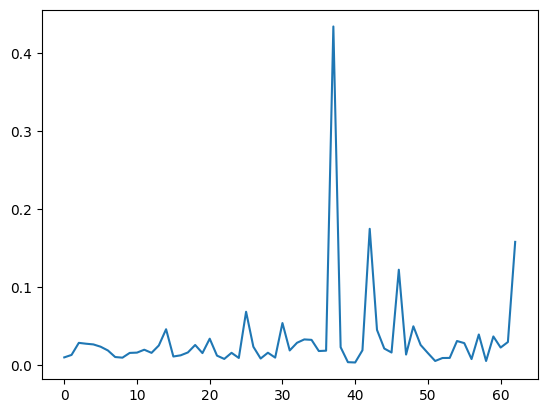

In [20]:
import matplotlib.pyplot as plt

plt.plot(distances)

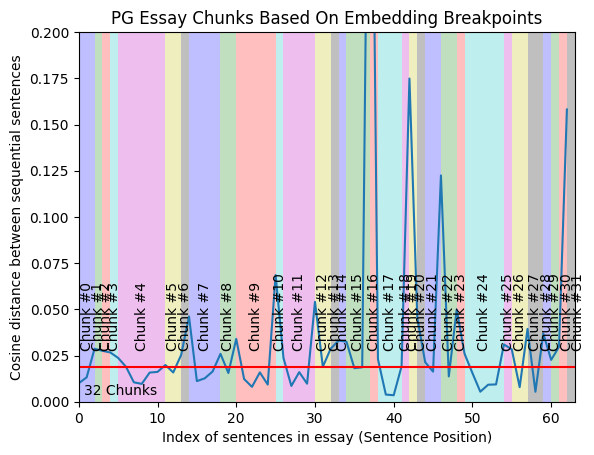

In [21]:
import numpy as np

plt.plot(distances);

y_upper_bound = .2
plt.ylim(0, y_upper_bound)
plt.xlim(0, len(distances))

# We need to get the distance threshold that we'll consider an outlier
# We'll use numpy .percentile() for this
breakpoint_percentile_threshold = 50
breakpoint_distance_threshold = np.percentile(distances, breakpoint_percentile_threshold) # If you want more chunks, lower the percentile cutoff
plt.axhline(y=breakpoint_distance_threshold, color='r', linestyle='-');

# Then we'll see how many distances are actually above this one
num_distances_above_theshold = len([x for x in distances if x > breakpoint_distance_threshold]) # The amount of distances above your threshold
plt.text(x=(len(distances)*.01), y=y_upper_bound/50, s=f"{num_distances_above_theshold + 1} Chunks");

# Then we'll get the index of the distances that are above the threshold. This will tell us where we should split our text
indices_above_thresh = [i for i, x in enumerate(distances) if x > breakpoint_distance_threshold] # The indices of those breakpoints on your list

# Start of the shading and text
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, breakpoint_index in enumerate(indices_above_thresh):
    start_index = 0 if i == 0 else indices_above_thresh[i - 1]
    end_index = breakpoint_index if i < len(indices_above_thresh) - 1 else len(distances)

    plt.axvspan(start_index, end_index, facecolor=colors[i % len(colors)], alpha=0.25)
    plt.text(x=np.average([start_index, end_index]),
             y=breakpoint_distance_threshold + (y_upper_bound)/ 20,
             s=f"Chunk #{i}", horizontalalignment='center',
             rotation='vertical')

# # Additional step to shade from the last breakpoint to the end of the dataset
if indices_above_thresh:
    last_breakpoint = indices_above_thresh[-1]
    if last_breakpoint < len(distances):
        plt.axvspan(last_breakpoint, len(distances), facecolor=colors[len(indices_above_thresh) % len(colors)], alpha=0.25)
        plt.text(x=np.average([last_breakpoint, len(distances)]),
                 y=breakpoint_distance_threshold + (y_upper_bound)/ 20,
                 s=f"Chunk #{i+1}",
                 rotation='vertical')

plt.title("PG Essay Chunks Based On Embedding Breakpoints")
plt.xlabel("Index of sentences in essay (Sentence Position)")
plt.ylabel("Cosine distance between sequential sentences")
plt.show()

In [43]:
len(chunks[24])

1443

In [22]:
import numpy as np

start_index = 0

# Create a list to hold the grouped sentences
chunks = []

# Iterate through the breakpoints to slice the sentences
for index in indices_above_thresh:
    # The end index is the current breakpoint
    end_index = index

    # Slice the sentence_dicts from the current start index to the end index
    group = sentences[start_index:end_index + 1]
    combined_text = ' '.join([d['sentence'] for d in group])
    chunks.append(combined_text)
    
    # Update the start index for the next group
    start_index = index + 1

# The last group, if any sentences remain
if start_index < len(sentences):
    combined_text = ' '.join([d['sentence'] for d in sentences[start_index:]])
    chunks.append(combined_text)

# grouped_sentences now contains the chunked sentences


In [45]:
for i, chunk in enumerate(chunks[:10]):
    buffer = 200
    
    print (f"Chunk #{i}")
    print (chunk[:buffer].strip())
    print ("...")
    print (chunk[-buffer:].strip())
    print ("\n")

Chunk #0
ADVISORY SERVICES AGREEMENT

This Advisory Services Agreement is entered into as of June 15th, 2023 (the “Effective Date”), by and between Cloud Investments Ltd., ID 51-426526-3, an Israeli company (t
...
provide it with certain Advisory services, as described in this Agreement; and
Whereas, 	Advisor has agreed to provide the Company with such services, subject to the terms set forth in this Agreement.


Chunk #1
NOW THEREFORE THE PARTIES AGREE AS FOLLOWS:

Services:  
Advisor shall provide to the Company, as an independent contractor, software development services, and / or any other services as agreed by the
...
Services:  
Advisor shall provide to the Company, as an independent contractor, software development services, and / or any other services as agreed by the parties from time to time (the “Services”).


Chunk #2
Advisor shall not appoint any sub-agents or delegates in connection with performance of the Services, nor assign any of his obligations or rights hereunder wi

In [46]:
len(chunks[24])

1443

In [55]:
len(chunks)

300

## checking for empty chunks and drops them

In [47]:
empty_chunks = [chunk for chunk in chunks if not chunk]
print(f"There are {len(empty_chunks)} empty chunks in the list")

There are 1 empty chunks in the list


In [48]:
chunks = [chunk for chunk in chunks if chunk]

In [49]:
empty_chunks = [chunk for chunk in chunks if not chunk]
print(f"There are {len(empty_chunks)} empty chunks in the list")

There are 0 empty chunks in the list


In [23]:
from dotenv import load_dotenv
import os
load_dotenv



<function dotenv.main.load_dotenv(dotenv_path: Union[str, ForwardRef('os.PathLike[str]'), NoneType] = None, stream: Optional[IO[str]] = None, verbose: bool = False, override: bool = False, interpolate: bool = True, encoding: Optional[str] = 'utf-8') -> bool>

In [4]:
import nbformat
import os

def concatenate_notebook(notebook_path):
    # Load the notebook
    with open(notebook_path, 'r', encoding='utf-8') as f:
        notebook = nbformat.read(f, as_version=4)
    
    # Concatenate all code cells into one cell
    concatenated_code = ""
    for cell in notebook.cells:
        if cell.cell_type == 'code':
            concatenated_code += cell.source + '\n\n'
    
    return concatenated_code

def write_to_python_file(notebook_path, concatenated_code):
    # Get the notebook name without extension
    notebook_name = os.path.splitext(os.path.basename(notebook_path))[0]
    
    # Write the concatenated code to a Python file
    python_file_path = f"{notebook_name}.py"
    with open(python_file_path, 'w', encoding='utf-8') as f:
        f.write(concatenated_code)
    
    print(f"Python file '{python_file_path}' created successfully.")

# Specify the path to your notebook file
notebook_path = "test.ipynb"

# Concatenate all code cells
concatenated_code = concatenate_notebook(notebook_path)

# Write the concatenated code to a Python file
write_to_python_file(notebook_path, concatenated_code)


Python file 'test.py' created successfully.


In [2]:
import sys
!{sys.executable} -m pip install nbformat

  Using cached nbformat-5.9.2-py3-none-any.whl (77 kB)
  Using cached fastjsonschema-2.19.1-py3-none-any.whl (23 kB)


In [24]:
from langchain_community.embeddings.spacy_embeddings import SpacyEmbeddings
embeddings = SpacyEmbeddings(model_name="en_core_web_sm")

In [26]:
from langchain_community.vectorstores import FAISS
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
vectorstore = FAISS.from_documents(chunks, embeddings)

AttributeError: 'str' object has no attribute 'page_content'

In [53]:
vectorstore.save_local("Robinson_splitter_updated")

In [54]:
from langchain_community.embeddings.spacy_embeddings import SpacyEmbeddings

from langchain_community.vectorstores import FAISS
embeddings = SpacyEmbeddings(model_name="en_core_web_sm")
vectorstore = FAISS.load_local("Robinson_splitter_updated", embeddings)
retriever = vectorstore.as_retriever(search_kwargs={"k" : 20}) 

In [55]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import CohereRerank
from langchain_community.embeddings.spacy_embeddings import SpacyEmbeddings

from langchain_community.vectorstores import FAISS
import os 
from dotenv import load_dotenv
load_dotenv
embeddings = SpacyEmbeddings(model_name="en_core_web_sm")
vectorstore = FAISS.load_local("Robinson_splitter_updated", embeddings)
retriever = vectorstore.as_retriever(search_kwargs={"k" : 20}) 
compressor = CohereRerank()
compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor, base_retriever=retriever
)

In [56]:
 
relevant_docs = compression_retriever.get_relevant_documents("What are the users' choices for the data used in providing basic services?")
relevant_docs

[Document(page_content='Entire Agreement; No Waiver or Assignment: This Agreement together with the Exhibits, which are attached hereto and incorporated herein, set forth the entire Agreement between the parties and shall supersede all previous communications and agreements between the parties, either oral or written. This Agreement may be modified only by a written amendment executed by both parties.', metadata={'relevance_score': 0.30486888}),
 Document(page_content='Governing Law and Jurisdiction:  This Agreement shall be governed by the laws of the State of Israel, without giving effect to the rules respecting conflicts of laws. The parties consent to the exclusive jurisdiction and venue of Tel Aviv courts for any lawsuit filed arising from or relating to this Agreement. Notices: Notices under this Agreement shall be delivered to the party’s email address as follows: Company: info@cloudcorp.com, Advisor: jackrobinson@gmail.com, or in any the other means with a proof of acceptance b

In [6]:
from langchain_core.prompts import ChatPromptTemplate
template = """<human>: As a legal contract advisor, your role is pivotal in navigating the complexities of the contract clause agreement. Your responsibility extends beyond mere interpretation; it encompasses a meticulous analysis and strategic elucidation of the user's query based on the given {context}. To accomplish this effectively, consider the following steps:

1. Contextual Understanding: Begin by immersing yourself in the provided contract clause or {context}, grasping the intricacies of the terms, conditions, and potential implications involved. Pay particular attention to any ambiguous language or clauses that may pose risks to your client.

2. User Query Analysis: Carefully dissect the user's question within the {context} or the contract clause. Identify any specific clauses or provisions that the question pertains to and analyze their impact on your client's interests or question.

3. Comprehensive Response: Craft a response that addresses the user's query comprehensively, taking into account the nuances of the contract clause. Provide detailed explanations and recommendations, ensuring that your client is fully informed of their rights and obligations under the agreement.

4. Risk Mitigation: As you formulate your response, prioritize the mitigation of risks inherent in the contract clause. Identify potential pitfalls or areas of concern and propose proactive measures to safeguard your client's interests and minimize their exposure to liability.

5. Strategic Communication: Ensure that your response is conveyed in a clear, concise, and persuasive manner. Articulate your points effectively, citing relevant legal precedents, industry standards, and best practices to support your arguments and strengthen your client's position.

By following these steps diligently, you can provide informed, strategic guidance that empowers your client and ensures the integrity of the contract clause agreement.

NB: If the provided {context} is not sufficient enough to answer the user question please avoid any assumption.
Question: {question}


\n

<bot>:
"""

ANSWER_PROMPT = ChatPromptTemplate.from_template(template)
from langchain.prompts.prompt import PromptTemplate

_template = """Given the following conversation and a follow up question, rephrase the follow up question to be a standalone question, in its original language.

Chat History:
{chat_history}
Follow Up Input: {question}
Standalone question:"""
CONDENSE_QUESTION_PROMPT = PromptTemplate.from_template(_template)


In [7]:
from langchain.prompts.prompt import PromptTemplate

_template = """Given the following conversation and a follow up question, rephrase the follow up question to be a standalone question, in its original language.

Chat History:
{chat_history}
Follow Up Input: {question}
Standalone question:"""
CONDENSE_QUESTION_PROMPT = PromptTemplate.from_template(_template)

In [8]:
from langchain.schema import format_document
from langchain_community.embeddings.spacy_embeddings import SpacyEmbeddings
from langchain_core.messages import AIMessage, HumanMessage, get_buffer_string
from langchain_core.runnables import RunnableParallel
from operator import itemgetter
from langchain_core.runnables import RunnablePassthrough
from langchain_openai import ChatOpenAI
from langchain.schema import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain.prompts.prompt import PromptTemplate
from scripts.test import process_file_and_generate_vectorstore

retriever = process_file_and_generate_vectorstore("file_path")
template = """<human>: As a legal contract advisor, your role is pivotal in navigating the complexities of the contract clause agreement. Your responsibility extends beyond mere interpretation; it encompasses a meticulous analysis and strategic elucidation of the user's query based on the given {context}. To accomplish this effectively, consider the following steps:

1. Contextual Understanding: Begin by immersing yourself in the provided contract clause or {context}, grasping the intricacies of the terms, conditions, and potential implications involved. Pay particular attention to any ambiguous language or clauses that may pose risks to your client.

2. User Query Analysis: Carefully dissect the user's question within the {context} or the contract clause. Identify any specific clauses or provisions that the question pertains to and analyze their impact on your client's interests or question.

3. Comprehensive Response: Craft a response that addresses the user's query comprehensively, taking into account the nuances of the contract clause. Provide detailed explanations and recommendations, ensuring that your client is fully informed of their rights and obligations under the agreement.

4. Risk Mitigation: As you formulate your response, prioritize the mitigation of risks inherent in the contract clause. Identify potential pitfalls or areas of concern and propose proactive measures to safeguard your client's interests and minimize their exposure to liability.

5. Strategic Communication: Ensure that your response is conveyed in a clear, concise, and persuasive manner. Articulate your points effectively, citing relevant legal precedents, industry standards, and best practices to support your arguments and strengthen your client's position.

By following these steps diligently, you can provide informed, strategic guidance that empowers your client and ensures the integrity of the contract clause agreement.

NB: If the provided {context} is not sufficient enough to answer the user question please avoid any assumption.
Question: {question}


\n

<bot>:
"""

ANSWER_PROMPT = ChatPromptTemplate.from_template(template)
from langchain.prompts.prompt import PromptTemplate

_template = """Given the following conversation and a follow up question, rephrase the follow up question to be a standalone question, in its original language.

Chat History:
{chat_history}
Follow Up Input: {question}
Standalone question:"""
CONDENSE_QUESTION_PROMPT = PromptTemplate.from_template(_template)


DEFAULT_DOCUMENT_PROMPT = PromptTemplate.from_template(template="{page_content}")


def _combine_documents(
    docs, document_prompt=DEFAULT_DOCUMENT_PROMPT, document_separator="\n\n"
):
    doc_strings = [format_document(doc, document_prompt) for doc in docs]
    return document_separator.join(doc_strings)
_inputs = RunnableParallel(
    standalone_question=RunnablePassthrough.assign(
        chat_history=lambda x: get_buffer_string(x["chat_history"])
    )
    | CONDENSE_QUESTION_PROMPT
    | ChatOpenAI(temperature=0)
    | StrOutputParser(),
)
_context = {
    "context": itemgetter("standalone_question") | retriever | _combine_documents,
    "question": lambda x: x["standalone_question"],
}
conversational_qa_chain = _inputs | _context | ANSWER_PROMPT | ChatOpenAI()

example_message = conversational_qa_chain.invoke(
    {
        "question": "what is the contract about?",
        "chat_history": [],
    }
)

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-l1jRz***************************************Af3y. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

In [2]:
from scripts.qafunction import create_conversational_qa_chain
conversational_qa_chain = create_conversational_qa_chain("data/Robinson Advisory.docx")
example_message = conversational_qa_chain.invoke(
    {
        "question": "what is the contract about?",
        "chat_history": [],
    }
)


Number of chunks: 31
Chunk 1:
ADVISORY SERVICES AGREEMENT

This Advisory Services Agreement is entered into as of June 15th, 2023 (the “Effective Date”), by and between Cloud Investments Ltd., ID 51-426526-3, an Israeli company (the "Company"), and Mr. Jack Robinson, Passport Number 780055578, residing at 1 Rabin st, Tel Aviv, Israel, Email: jackrobinson@gmail.com ("Advisor"). Whereas,	Advisor has expertise and/or knowledge and/or relationships, which are relevant to the Company’s business and the Company has asked Advisor to provide it with certain Advisory services, as described in this Agreement; and
Whereas, 	Advisor has agreed to provide the Company with such services, subject to the terms set forth in this Agreement.

Chunk 2:
NOW THEREFORE THE PARTIES AGREE AS FOLLOWS:

Services:  
Advisor shall provide to the Company, as an independent contractor, software development services, and / or any other services as agreed by the parties from time to time (the “Services”).

Chunk 3:
Ad

In [3]:
example_message = conversational_qa_chain.invoke(
    {
        "question": "what is the contract about?",
        "chat_history": [],
    }
)

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-l1jRz***************************************Af3y. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

In [ ]:
class AIMessage:
    def __init__(self, content):
        self.content = content

# Example instance
# Define the question outside of the dictionary
question = "what is the contract about?"

# Use the variable inside the dictionary
example_message = conversational_qa_chain.invoke(
    {
        "question": "what is the contract about?",
        "chat_history": [],
    }
)

# Function to print content with line breaks
def print_with_line_breaks(message, max_line_length=80):
    words = message.split()
    lines = []
    current_line = ''
    for word in words:
        if len(current_line) + len(word) + 1 <= max_line_length:
            current_line += word + ' '
        else:
            lines.append(current_line)
            current_line = word + ' '
    if current_line:
        lines.append(current_line)
    for line in lines:
        print(line)

# Print the content with line breaks
print("Message content:")
print_with_line_breaks(example_message.content)


NameError: name 'conversational_qa_chain' is not defined

# EVALUATION


In [64]:
prompt = ChatPromptTemplate.from_template(template)

# Setup RAG pipeline
rag_chain = (
    {"context": compression_retriever,  "question": RunnablePassthrough()} 
    | prompt 
    | ChatOpenAI()
    | StrOutputParser() 
)

In [67]:
from datasets import Dataset
import time
questions = ["Who are the parties to the Agreement and what are their defined names?", 
             "What is the termination notice?",
             "What are the payments to the Advisor under the Agreement? ","Can the Agreement or any of its obligations be assigned?","Who owns the IP? ","Is there a non-compete obligation to the Advisor?"," Can the Advisor charge for meal time?","In which street does the Advisor live?","Is the Advisor entitled to social benefits?","What happens if the Advisor claims compensation based on employment relationship with the Company?"
            ]
ground_truths = [[" Cloud Investments Ltd. (“Company”) and Jack Robinson (“Advisor”)"],
                ["According to section 4:14 days for convenience by both parties. The Company may terminate without notice if the Advisor refuses or cannot perform the Services or is in breach of any provision of this Agreement."],
                ["According to section 6: 1. Fees of $9 per hour up to a monthly limit of $1,500, 2. Workspace expense of $100 per month, 3. Other reasonable and actual expenses if approved by the company in writing and in advance."],
                ["1. Under section 1.1 the Advisor can’t assign any of his obligations without the prior written consent of the Company, 2. Under section 9  the Advisor may not assign the Agreement and the Company may assign it, 3 Under section 9 of the Undertaking the Company may assign the Undertaking."],
                ["According to section 4 of the Undertaking (Appendix A), Any Work Product, upon creation, shall be fully and exclusively owned by the Company."],
                ["Yes. During the term of engagement with the Company and for a period of 12 months thereafter."],
                ["No. See Section 6.1, Billable Hour doesn’t include meals or travel time. "],
                ["1 Rabin st, Tel Aviv, Israel "],
                ["No. According to section 8 of the Agreement, the Advisor is an independent consultant and shall not be entitled to any overtime pay, insurance, paid vacation, severance payments or similar fringe or employment benefits from the Company."],
                ["If the Advisor is determined to be an employee of the Company by a governmental authority, payments to the Advisor will be retroactively reduced so that 60% constitutes salary payments and 40% constitutes payment for statutory rights and benefits. The Company may offset any amounts due to the Advisor from any amounts payable under the Agreement. The Advisor must indemnify the Company for any losses or expenses incurred if an employer/employee relationship is determined to exist."]]
answers = []
contexts = []

# Inference
for query in questions:
  answers.append(rag_chain.invoke(query))
  contexts.append([docs.page_content for docs in compression_retriever.get_relevant_documents(query)])
  time.sleep(5)
# To dict
data = {
    "question": questions,
    "answer": answers,
    "contexts": contexts,
    "ground_truths": ground_truths
}

# Convert dict to dataset
dataset = Dataset.from_dict(data)

In [43]:

#save the files locally

output_file = "robinson_evaluation.json"
dataset.save_to_disk(output_file)

print(f"Dataset saved to {output_file}")


Saving the dataset (1/1 shards): 100%|██████████| 10/10 [00:00<00:00, 54.88 examples/s]

Dataset saved to robinson_evaluation.json


In [68]:
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_recall,
    context_precision,
)

result = evaluate(
    dataset = dataset, 
    metrics=[
        context_precision,
        context_recall,
        faithfulness,
        answer_relevancy,
    ],
)

df = result.to_pandas()

passing column names as 'ground_truths' is deprecated and will be removed in the next version, please use 'ground_truth' instead. Note that `ground_truth` should be of type string and not Sequence[string] like `ground_truths`
Evaluating: 100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


In [69]:
df

,question,answer,contexts,ground_truths,ground_truth,context_precision,context_recall,faithfulness,answer_relevancy
0,Who are the parties to the Agreement and what ...,"Based on the provided contract clause, the par...","[In addition, the Company shall reimburse Advi...",[ Cloud Investments Ltd. (“Company”) and Jack ...,Cloud Investments Ltd. (“Company”) and Jack R...,1.000000,0.5,NaN,0.953996
1,What is the termination notice?,"Based on the provided document, the terminatio...","[Without derogating from the foregoing, the Ad...",[According to section 4:14 days for convenienc...,According to section 4:14 days for convenience...,0.500000,0.0,1.00,0.936876
2,What are the payments to the Advisor under the...,"Based on the provided contract clauses, the pa...",[As full and sole consideration for the Servic...,[According to section 6: 1. Fees of $9 per hou...,According to section 6: 1. Fees of $9 per hour...,0.833333,1.0,1.00,0.974789
3,Can the Agreement or any of its obligations be...,"Based on the provided documents, it appears th...",[The Company may assign the Agreement to a suc...,[1. Under section 1.1 the Advisor can’t assign...,1. Under section 1.1 the Advisor can’t assign ...,0.833333,1.0,NaN,0.000000
4,Who owns the IP?,To address the question of who owns the intell...,[The Advisor agrees that any and all disputes ...,[According to section 4 of the Undertaking (Ap...,According to section 4 of the Undertaking (App...,0.000000,1.0,0.60,0.900744
5,Is there a non-compete obligation to the Advisor?,"Yes, there is a non-compete obligation imposed...","[The Advisor, immediately upon Company’s reque...",[Yes. During the term of engagement with the C...,Yes. During the term of engagement with the Co...,1.000000,1.0,0.80,0.965398
6,Can the Advisor charge for meal time?,"Based on the provided contract clause, the Adv...",[In case the Advisor has been providing Servic...,"[No. See Section 6.1, Billable Hour doesn’t in...","No. See Section 6.1, Billable Hour doesn’t inc...",0.583333,1.0,0.75,0.940322
7,In which street does the Advisor live?,Based on the provided Advisory Services Agreem...,[ADVISORY SERVICES AGREEMENT\n\nThis Advisory ...,"[1 Rabin st, Tel Aviv, Israel ]","1 Rabin st, Tel Aviv, Israel",1.000000,1.0,1.00,0.811000
8,Is the Advisor entitled to social benefits?,"Based on the provided contract clauses, the Ad...","[In addition, the Company shall reimburse Advi...","[No. According to section 8 of the Agreement, ...","No. According to section 8 of the Agreement, t...",1.000000,1.0,0.80,0.966377
9,What happens if the Advisor claims compensatio...,If the Advisor claims compensation based on an...,"[Advisor shall not be deemed to be, nor treate...",[If the Advisor is determined to be an employe...,If the Advisor is determined to be an employee...,1.000000,1.0,1.00,0.989160


In [70]:
df.to_csv("evaluation_robinson_ranked.csv")

In [71]:
import pandas as pd
df = pd.read_csv("evaluation_robinson_ranked.csv")
df.head(5)

,Unnamed: 0,question,answer,contexts,ground_truths,ground_truth,context_precision,context_recall,faithfulness,answer_relevancy
0,0,Who are the parties to the Agreement and what ...,"Based on the provided contract clause, the par...","[""In addition, the Company shall reimburse Adv...",[' Cloud Investments Ltd. (“Company”) and Jack...,Cloud Investments Ltd. (“Company”) and Jack R...,1.000000,0.5,NaN,0.953996
1,1,What is the termination notice?,"Based on the provided document, the terminatio...","['Without derogating from the foregoing, the A...",['According to section 4:14 days for convenien...,According to section 4:14 days for convenience...,0.500000,0.0,1.0,0.936876
2,2,What are the payments to the Advisor under the...,"Based on the provided contract clauses, the pa...",['As full and sole consideration for the Servi...,['According to section 6: 1. Fees of $9 per ho...,According to section 6: 1. Fees of $9 per hour...,0.833333,1.0,1.0,0.974789
3,3,Can the Agreement or any of its obligations be...,"Based on the provided documents, it appears th...",['The Company may assign the Agreement to a su...,['1. Under section 1.1 the Advisor can’t assig...,1. Under section 1.1 the Advisor can’t assign ...,0.833333,1.0,NaN,0.000000
4,4,Who owns the IP?,To address the question of who owns the intell...,['The Advisor agrees that any and all disputes...,['According to section 4 of the Undertaking (A...,According to section 4 of the Undertaking (App...,0.000000,1.0,0.6,0.900744


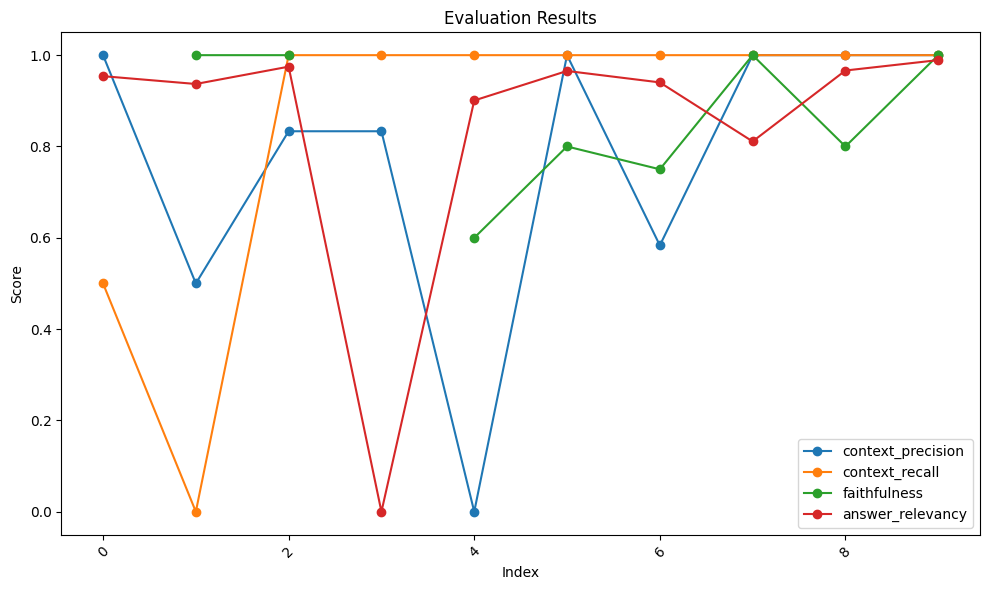

In [72]:
import matplotlib.pyplot as plt

# Plot each metric
plt.figure(figsize=(10, 6))
for column in ['context_precision', 'context_recall', 'faithfulness', 'answer_relevancy']:
    plt.plot(df.index, df[column], marker='o', label=column)

# Add labels and legend
plt.title('Evaluation Results')
plt.xlabel('Index')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


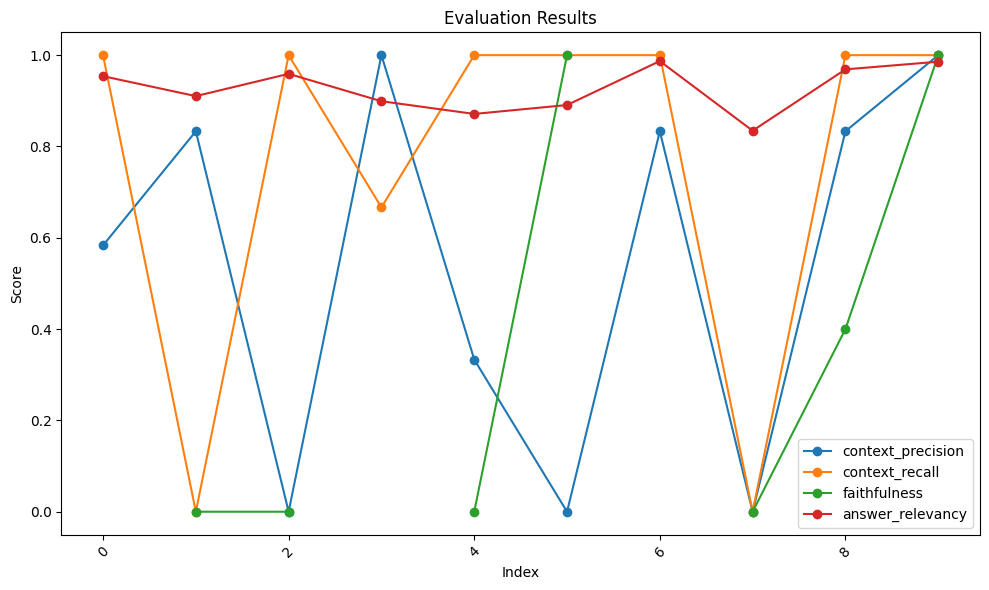

In [38]:
import matplotlib.pyplot as plt

# Plot each metric
plt.figure(figsize=(10, 6))
for column in ['context_precision', 'context_recall', 'faithfulness', 'answer_relevancy']:
    plt.plot(df.index, df[column], marker='o', label=column)

# Add labels and legend
plt.title('Evaluation Results')
plt.xlabel('Index')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
